# Telecommunications Customer Churn Forecasting using Machine Learning: A path to Retention Excellence

In the realm of telecommunications, nurturing existing customer relationships through churn forecasting not only safeguards revenue streams but also builds a bridge to retention excellence. A stitch in time, via predictive analytics, saves five in acquisition costs.

# Introduction

#### Understanding Customer Churn
Customer churn is a pivotal metric in the business world, particularly within the telecom industry. It signifies the departure of customers or subscribers from a particular service or firm, a transition from active engagement to disassociation.

In the telecom industry, customers wield the power to choose from an array of service providers, exhibiting an inclination to switch providers frequently. This environment, highly competitive, witnesses an annual churn rate ranging from 15-25%, emphasizing the dynamic and competitive nature of the industry.

Retaining customers in a personalized manner is a formidable challenge for most firms, given the substantial customer base. Individualized attention to each customer is impractical due to associated costs, potentially outweighing the additional revenue that could be generated. Nonetheless, forecasting customer departure allows businesses to concentrate their retention efforts on these "high risk" clients.

####  The Power of Anticipation

The ability to predict which customers are likely to discontinue their association with a company is paramount in reducing churn. Proactive prediction enables targeted efforts to retain customers who show signs of potential churn, aligning with the broader goal of expanding coverage and fostering customer loyalty.



The crux of success in this industry resides in the customer. Every strategic move and operational decision must orbit around understanding and meeting customer needs, thereby enhancing satisfaction and retention.

Customer churn represents a financial concern. It's substantially more cost-effective to retain existing customers than to embark on acquiring new ones. To mitigate churn and bolster profits, the primary strategic focus of telecom companies is client retention through the implementation of effective strategies.

#### Aim: Predicting Churn for Retention Excellence

This project delves into the realm of telecommunications customer churn forecasting, employing advanced machine learning techniques. The overarching aim is to enhance customer retention strategies, thereby driving retention excellence and fortifying the industry's competitive edge.

In [522]:
# Loading libraries 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [523]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [524]:
#loading the dataset
telco = pd.read_csv('Telco.csv')

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [525]:
telco.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Dataset Description

The dataset includes information about customers from a telecommunications company. Each row represents a customer, and each column contains customer attributes described in the column metadata.

#### Customer Churn
Churn: Customers who left within the last month (Yes/No)

#### Services
Phone Service: Customer subscribes to home phone service with the company (Yes/No)  
Multiple Lines: Customer subscribes to multiple telephone lines with the company (Yes/No)  
Internet Service: Customer subscribes to Internet service with the company (No, DSL, Fiber Optic, Cable)  
Online Security: Customer subscribes to additional online security service (Yes/No)  
Online Backup: Customer subscribes to additional online backup service (Yes/No)  
Device Protection Plan: Customer subscribes to additional device protection plan (Yes/No)  
Tech Support: Customer subscribes to additional technical support plan (Yes/No)  
Streaming TV: Customer uses Internet service to stream television programming (Yes/No)  
Streaming Movies: Customer uses Internet service to stream movies (Yes/No)

#### Customer Account Information
Tenure: How long the customer has been with the company  
Contract: Customer's current contract type (Month-to-Month, One Year, Two Year)  
Payment Method: How the customer pays their bill (Bank Withdrawal, Credit Card, Mailed Check)  
Paperless Billing: Customer has chosen paperless billing (Yes/No)  
Monthly Charges: Customer's current total monthly charge for all services  
Total Charges: Customer's total charges calculated to the end of the specified quarter

#### Demographic Information
Gender: Customer’s gender (Male, Female)    
Senior Citizen: Indicates if the customer is 65 or older (Yes/No)  
Partner: Indicates if the customer is married (Yes/No)  
Dependents: Indicates if the customer lives with any dependents (Yes/No)    

This information provides a comprehensive overview of the attributes in the dataset, including customer services, account information, and demographic details.

## Data Exploration and Preparation

In [526]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [527]:
# Converting non-convertible values to NaN
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

#Checking for missing or NaN values
telco['TotalCharges'].isnull().sum()

11

In [528]:
telco.columns = telco.columns.str.lower().str.replace(' ', '_')

string_columns = list(telco.dtypes[telco.dtypes == 'object'].index)

for col in string_columns:
    telco[col] = telco[col].str.lower().str.replace(' ', '_')

In [529]:
telco.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [530]:
telco.columns.values

array(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'churn'], dtype=object)

- Churn is the target variable we will use for prediction

In [531]:
# Checking for outliers in the dataset
# Calculate IQR for each feature
Q1 = telco[['tenure', 'monthlycharges', 'totalcharges']].quantile(0.25)
Q3 = telco[['tenure', 'monthlycharges', 'totalcharges']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((telco[['tenure', 'monthlycharges', 'totalcharges']] < lower_bound) | 
            (telco[['tenure', 'monthlycharges', 'totalcharges']] > upper_bound))

# Count the outliers for each feature
outliers_count = outliers.sum()

# Display the count of outliers
print("Count of outliers for each feature:")
print(outliers_count)

Count of outliers for each feature:
tenure            0
monthlycharges    0
totalcharges      0
dtype: int64


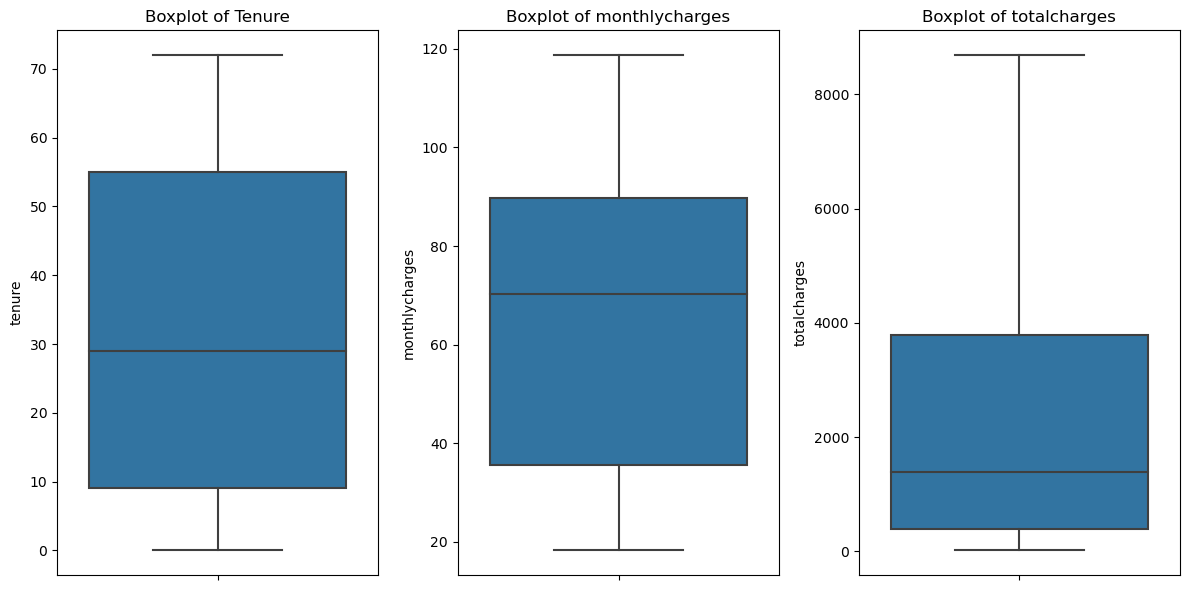

In [532]:
plt.figure(figsize=(12, 6))

# Boxplot for tenure
plt.subplot(1, 3, 1)
sns.boxplot(y='tenure', data=telco)
plt.title('Boxplot of Tenure')
plt.xticks(rotation=90)

# Boxplot for MonthlyCharges
plt.subplot(1, 3, 2)
sns.boxplot(y='monthlycharges', data=telco)
plt.title('Boxplot of monthlycharges')
plt.xticks(rotation=90)

# Boxplot for TotalCharges
plt.subplot(1, 3, 3)
sns.boxplot(y='totalcharges', data=telco)
plt.title('Boxplot of totalcharges')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- No outliers in the data which is good.

In [533]:
# Checking for missing values
telco.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

- From the above, it shows there are missing values in TotalCharges

In [534]:
# Fill missing values in 'TotalCharges' with the mean
telco['totalcharges'].fillna(telco['totalcharges'].mean(), inplace=True)

# convert 'TotalCharges' to float
telco['totalcharges'] = telco['totalcharges'].astype(float)

# Checking the data types
telco.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [535]:
telco.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [536]:
# check internetservice
telco['internetservice'].describe(include=['object', 'bool'])

count            7043
unique              3
top       fiber_optic
freq             3096
Name: internetservice, dtype: object

In [537]:
telco.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- Approximately 75% of our customers have a tenure of less than 55 months.

- The average monthly charge across our customer base is USD 64.76.

- 25% of our customers contribute more significantly, with monthly payments surpassing USD 89.85.

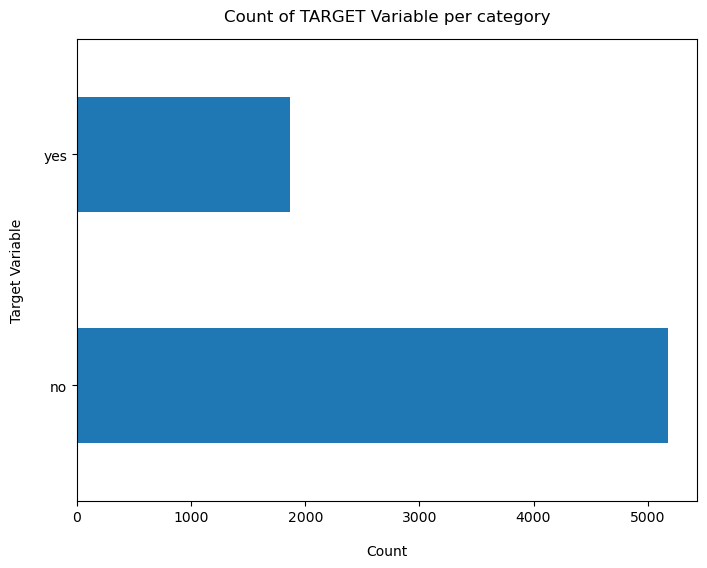

In [538]:
telco['churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Target Variable', labelpad=14)
plt.title('Count of TARGET Variable per category', y=1.02);

In [539]:
100*telco['churn'].value_counts()/len(telco['churn'])

churn
no     73.463013
yes    26.536987
Name: count, dtype: float64

In [540]:
telco['churn'].value_counts()

churn
no     5174
yes    1869
Name: count, dtype: int64

- The data is highly imbalanced with ratio 73:27 which can cause bias, we will handle this later

In [541]:
#drop the customerID as it's not necessary
telco = telco.drop(['customerid'], axis = 1)
telco.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


# Data Visualization

### Descriptive Analysis

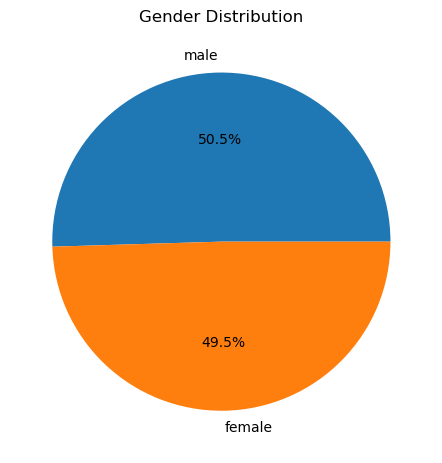

In [542]:
# Gender Distribution (Pie Chart)
gender_counts = telco['gender'].value_counts()
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution');

- Customers are 49.5% Female and 50.5% Male which is almost balanced

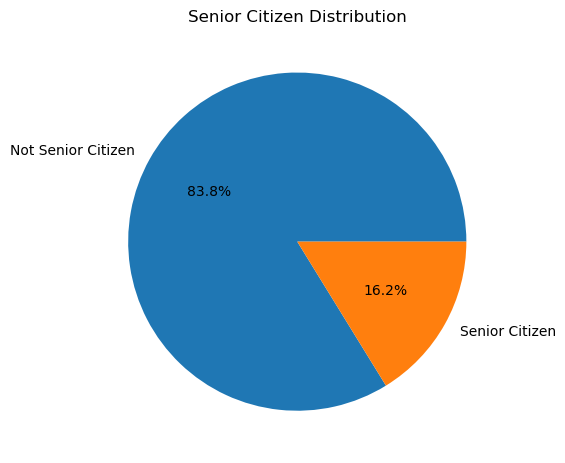

In [543]:
# Senior Citizen Distribution (Pie Chart)
senior_counts = telco['seniorcitizen'].value_counts()
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.pie(senior_counts, labels=['Not Senior Citizen', 'Senior Citizen'], autopct='%1.1f%%')
plt.title('Senior Citizen Distribution');

- Most of the Customers 83.8% are not Senior Citizens, with 16.2% of them being Senior Citizens  
ie Senior Citizens are aged 65 years and above.

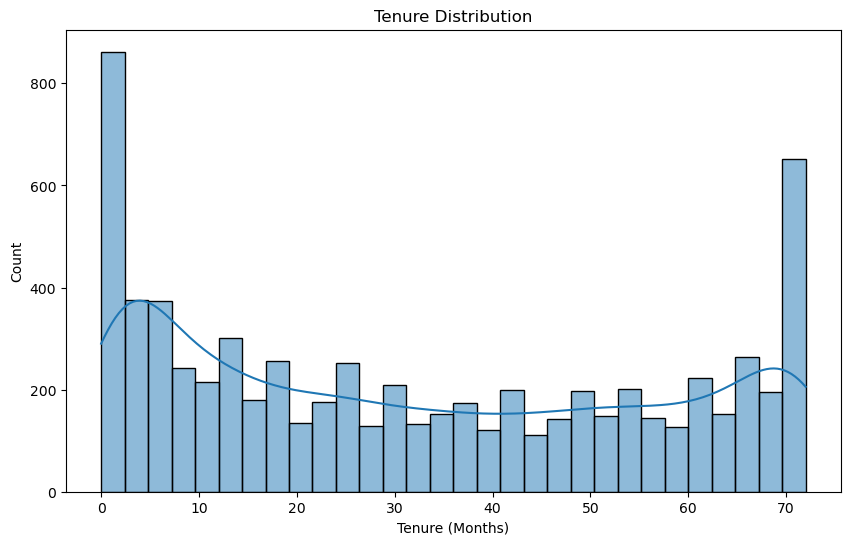

In [544]:
# tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(telco['tenure'], bins=30, kde=True)
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.title('Tenure Distribution')
plt.show()

- New customers are more likely to churn, probably they don't like the service they get.

<Figure size 1200x600 with 0 Axes>

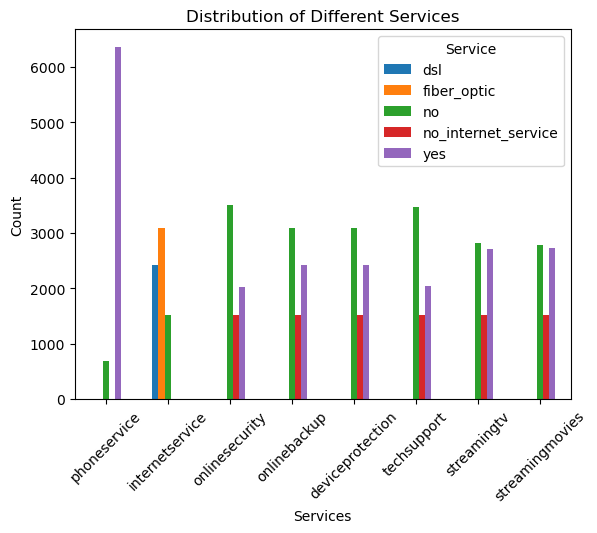

In [545]:
# Services Distribution

services_cols = ['phoneservice', 'internetservice', 'onlinesecurity', 'onlinebackup', 
                 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

services_counts = telco[services_cols].apply(lambda x: x.value_counts()).transpose()

plt.figure(figsize=(12, 6))
services_counts.plot(kind='bar')
plt.xlabel('Services')
plt.ylabel('Count')
plt.title('Distribution of Different Services')
plt.xticks(rotation=45)
plt.legend(title='Service', bbox_to_anchor=(1, 1))
plt.show()

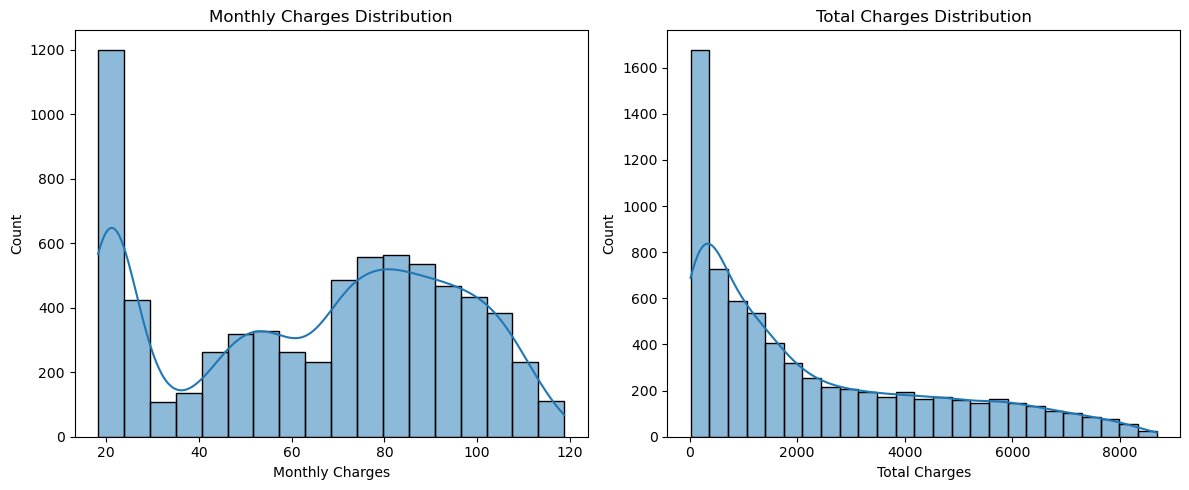

In [546]:
# Monthly and TotalCharges Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(telco['monthlycharges'], kde=True)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Monthly Charges Distribution')

plt.subplot(1, 2, 2)
sns.histplot(telco['totalcharges'], kde=True)
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

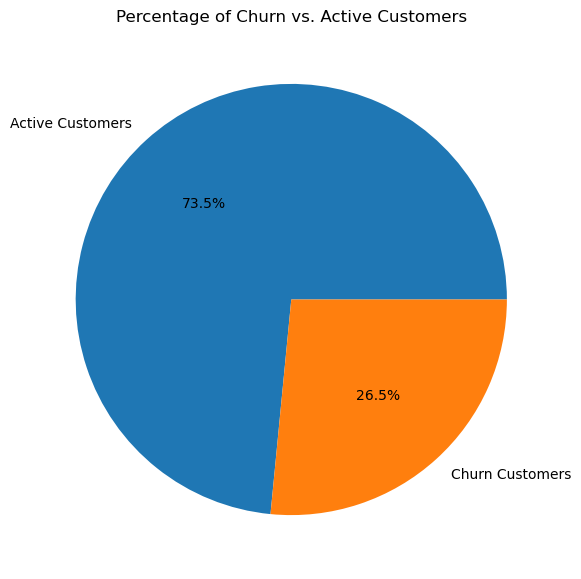

In [547]:
# Percentage of Churn vs. Active Customers
churn_percentage = telco['churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(7, 7))
plt.pie(churn_percentage, labels=['Active Customers', 'Churn Customers'], autopct='%1.1f%%')
plt.title('Percentage of Churn vs. Active Customers')
plt.show()

### Churn Analysis

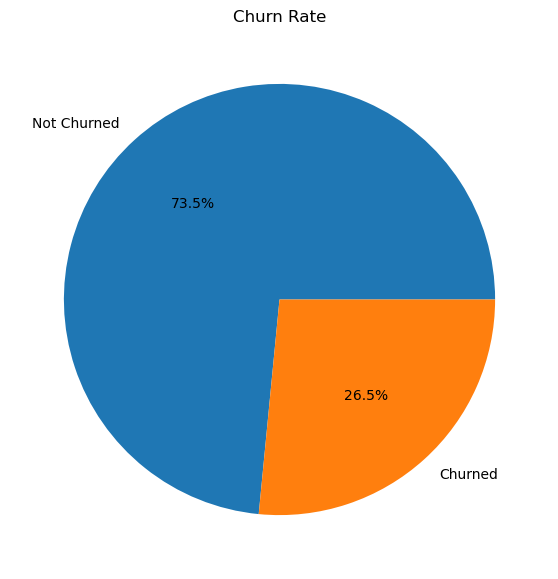

In [548]:
# Churn rate
churn_rate = telco['churn'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(churn_rate, labels=['Not Churned', 'Churned'], autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()

- 26.6% of customers left the company.

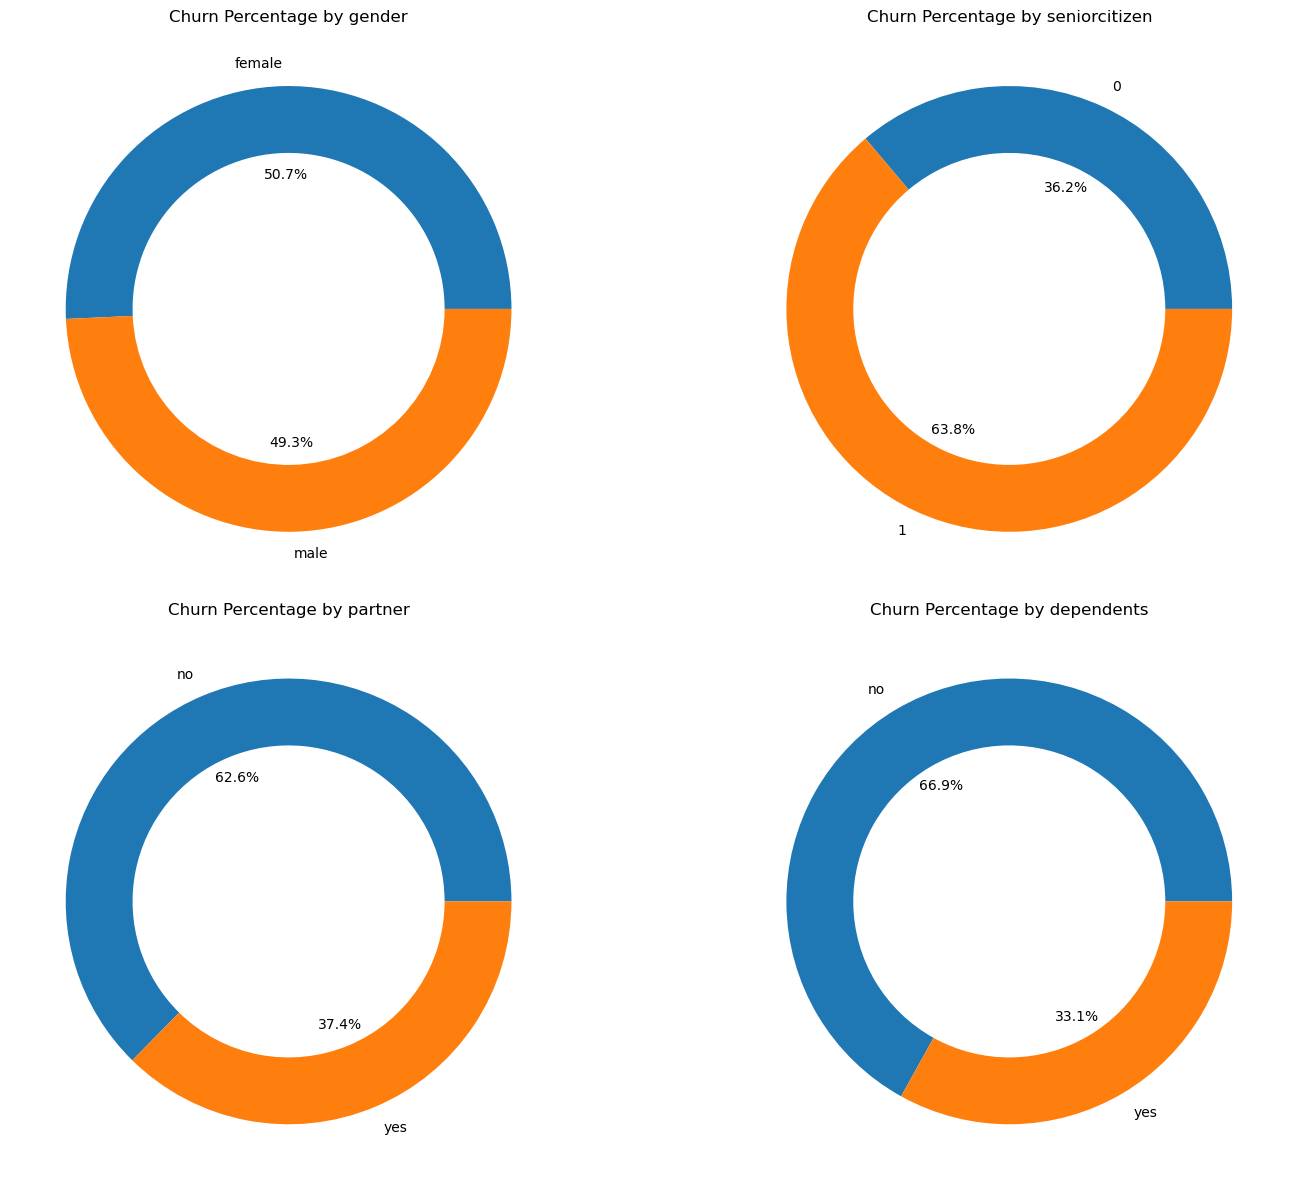

In [549]:
# churn based on Demographic variables
import matplotlib.pyplot as plt

# Calculate churn percentage by demographic variables
demographic_cols = ['gender', 'seniorcitizen', 'partner', 'dependents']

plt.figure(figsize=(16, 12))

for i, col in enumerate(demographic_cols, start=1):
    plt.subplot(2, 2, i)
    demographic_churn = telco.groupby([col, 'churn']).size().unstack()
    demographic_churn_percentage = (demographic_churn['yes'] / (demographic_churn['no'] + demographic_churn['yes'])) * 100
    plt.pie(demographic_churn_percentage, labels=demographic_churn_percentage.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
    plt.title(f'Churn Percentage by {col}')

plt.tight_layout()
plt.show()

- More Female customers churned as compared to Male
- 63.8% Senior Citizens left as compared to 36.2% who stayed
- Over 30% of customers with Partner and Dependents churned, Probably the serive favours single customers


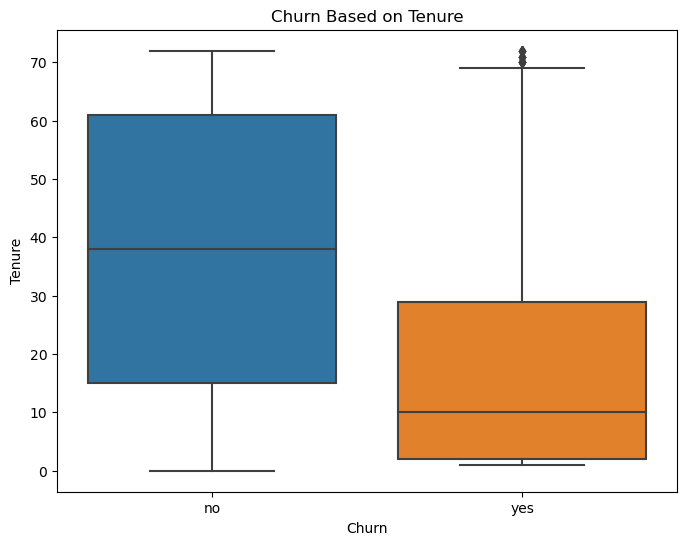

In [550]:
# Churn Based on Tenure
plt.figure(figsize=(8,6))
sns.boxplot(x='churn', y='tenure', data=telco)
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Churn Based on Tenure')
plt.show;

- New customers are more likely to opt out of the contract.

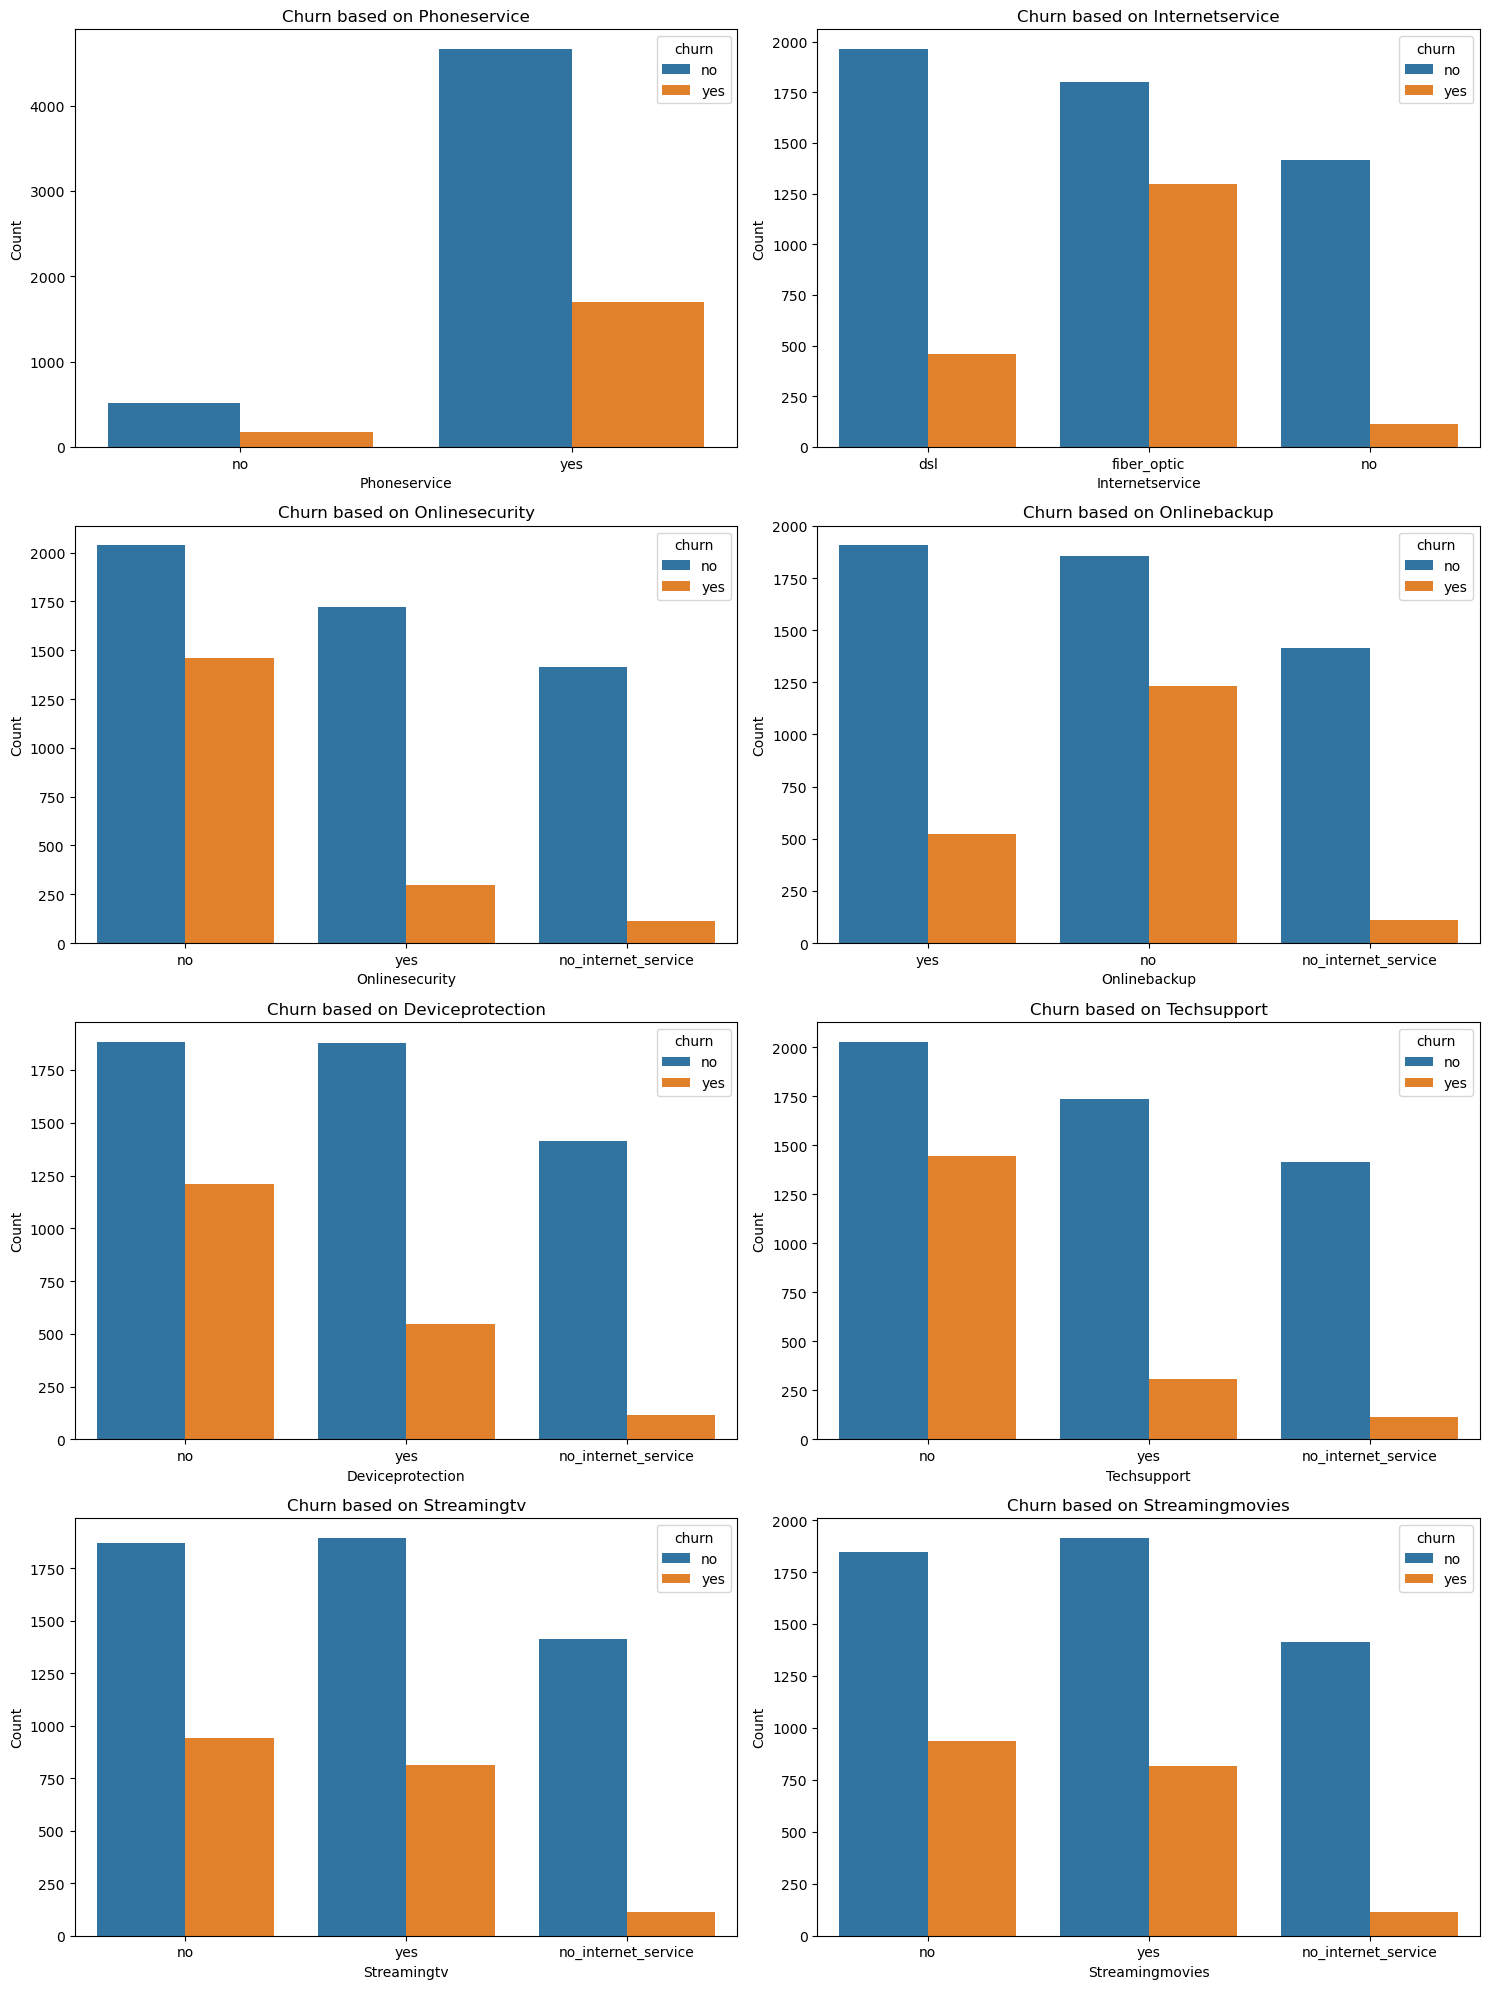

In [551]:
# Churn based on service availability
service_cols = ['phoneservice', 'internetservice', 'onlinesecurity', 'onlinebackup', 
                 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

plt.figure(figsize=(15, 20))

for i, col in enumerate(service_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=telco, x=col, hue='churn')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title(f'Churn based on {col.capitalize()}')
    
plt.tight_layout()
plt.show();

- Customers with Streamingtv and Streamingmovies serivces are likely to churn.  
- Lot of customers use Fibre optic service and they have a high churn rate probably there are not satisfied at the service.  
DSL customers have low churn rate. 
- Custoemers wint no Techsupport and Deviceprotection are likely to port to another service provider.
- A lot of customers without Onlinesecurity and Onlinebackup are likely to migrate to a competitor. 

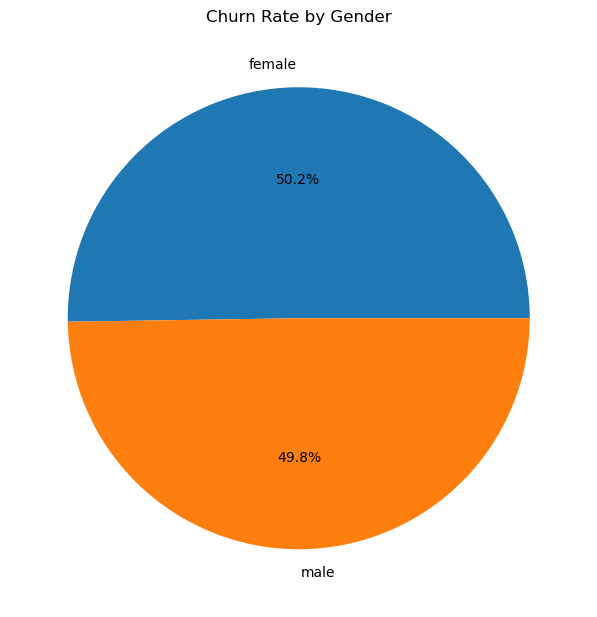

In [552]:
# Churn rate based on gender
churn_by_gender = telco.groupby(['gender', 'churn']).size().unstack()
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 2)
plt.pie(churn_by_gender['yes'], labels=churn_by_gender.index, autopct='%1.1f%%')
plt.title('Churn Rate by Gender')
plt.tight_layout()
plt.show()

- male customers are likely to opt out

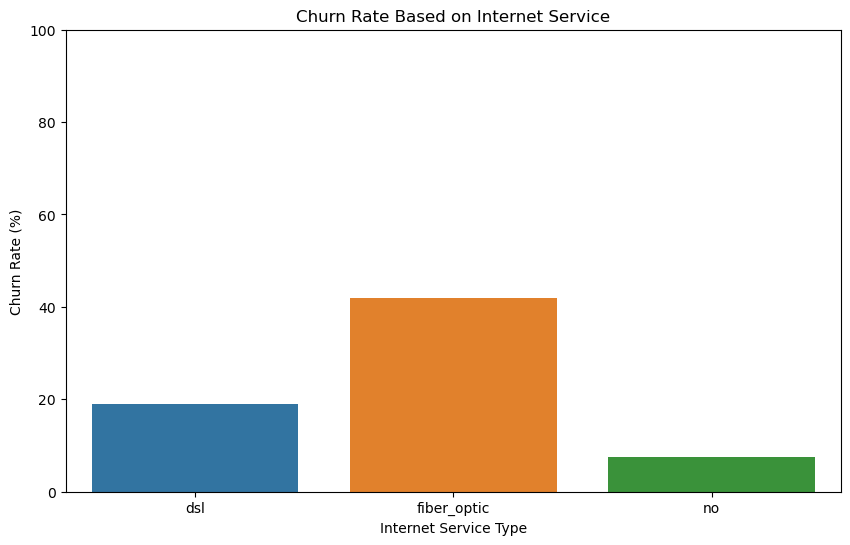

In [553]:
# Convert 'Churn' to binary numerical values
telco['ChurnBinary'] = telco['churn'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate churn rate for each service
service_churn_rate = telco.groupby('internetservice')['ChurnBinary'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=service_churn_rate.index, y=service_churn_rate.values*100)
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate Based on Internet Service')
plt.ylim(0, 100)
plt.show()

### Correlations and Relationships

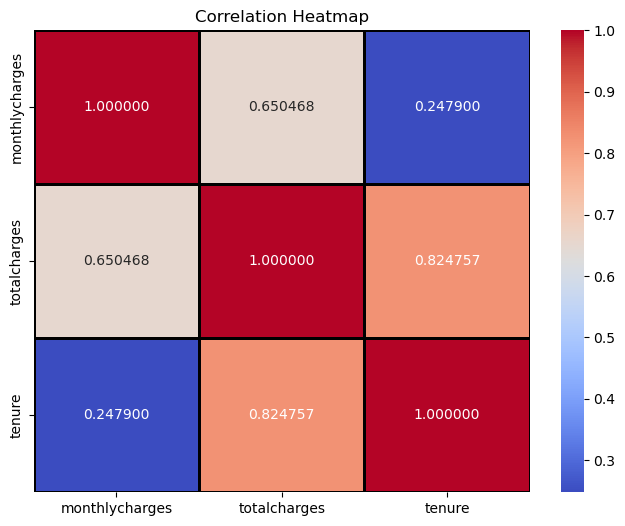

In [554]:
correlation_matrix = telco[['monthlycharges', 'totalcharges', 'tenure']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='2f',linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

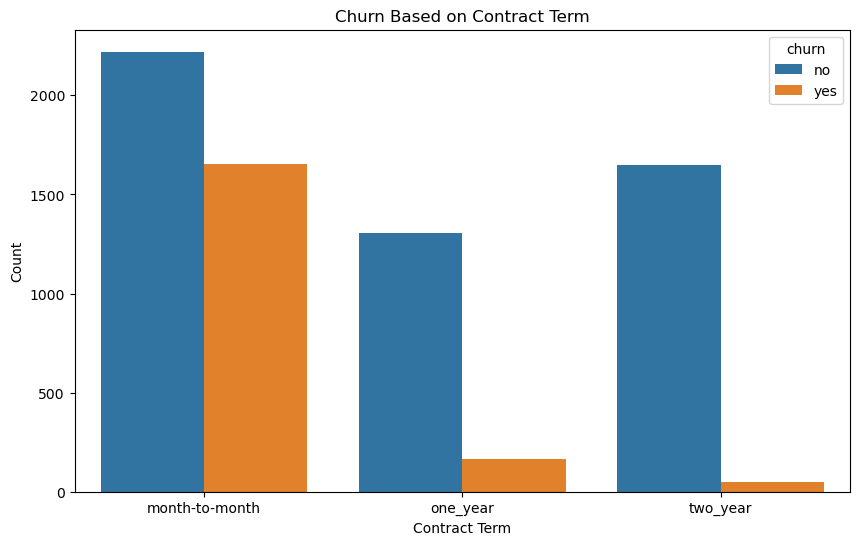

In [555]:
# Contract Term vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=telco, x='contract', hue='churn')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.title('Churn Based on Contract Term');

- Customers with Month-Month Contract opted out of the service as compared with customers with One & Two year contracts

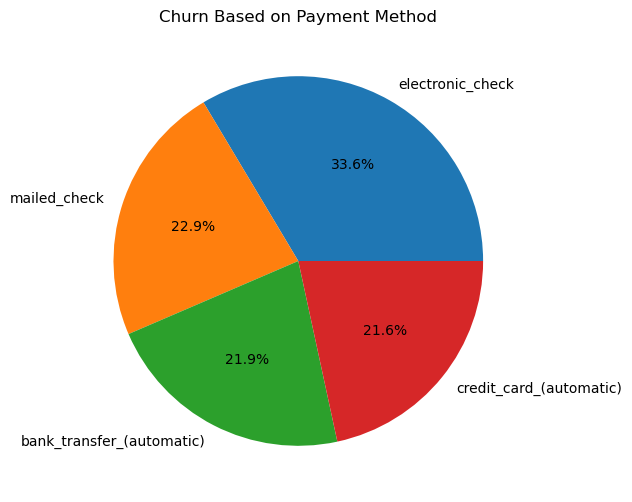

In [556]:
# Churn based on payment method
payment_counts = telco['paymentmethod'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Churn Based on Payment Method')
plt.show()

- Majority of customers who opted out have Electronic check as their Payment Method.
- Other customers who picked Credit card automatic, Bank transfer automatic or Mailed check were less likely to opt out.

### Comparative Analysis

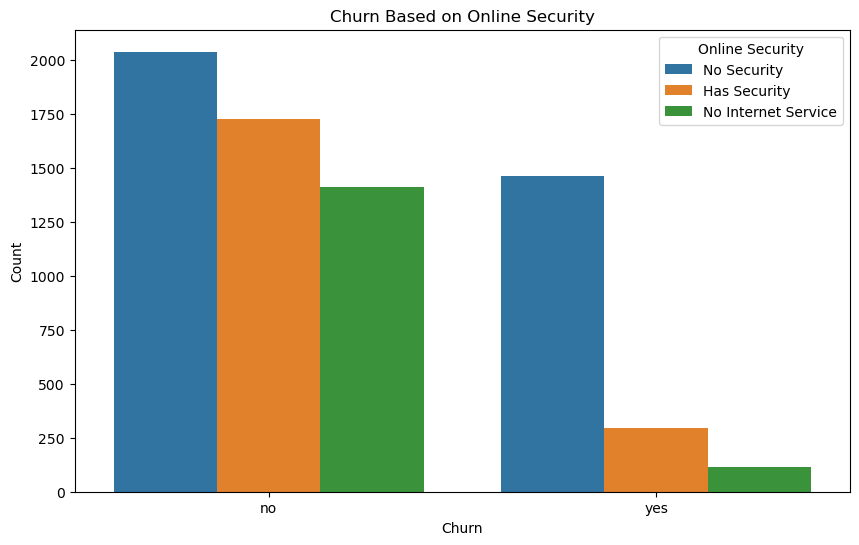

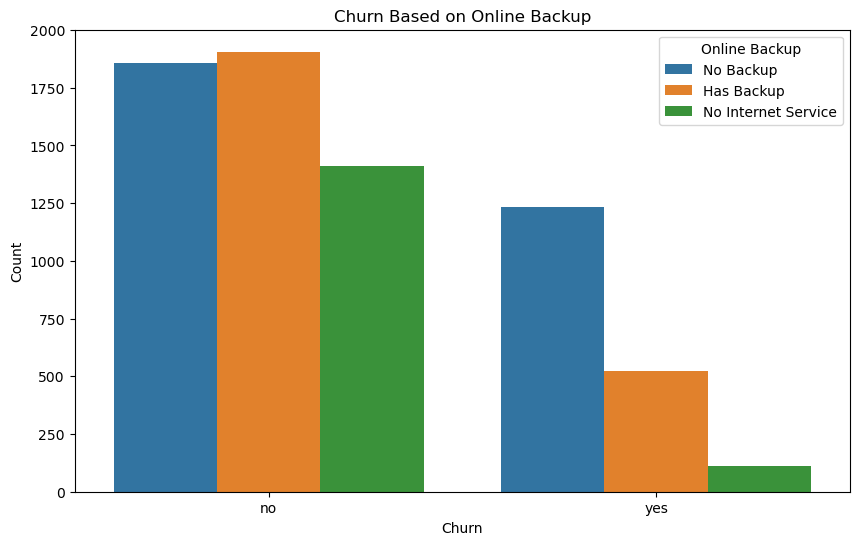

In [557]:
# Count of customers based on churn and online security
churn_security_counts = telco.groupby(['churn', 'onlinesecurity']).size().unstack()

# Count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=telco, x='churn', hue='onlinesecurity', hue_order=['no', 'yes', 'no_internet_service'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Based on Online Security')
plt.legend(title='Online Security', labels=['No Security', 'Has Security', 'No Internet Service'])
plt.show()

# Count of customers based on churn and online backup
churn_backup_counts = telco.groupby(['churn', 'onlinebackup']).size().unstack()

# Count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=telco, x='churn', hue='onlinebackup', hue_order=['no', 'yes', 'no_internet_service'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Based on Online Backup')
plt.legend(title='Online Backup', labels=['No Backup', 'Has Backup', 'No Internet Service'])
plt.show()

- There is a signifact difference in churn rates for customers with Month-to-Month contract as compared to One year and Two year. 

In [558]:
telco = telco.drop(['ChurnBinary'], axis = 1)
telco.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [560]:
telco.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [561]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [562]:
telco.churn = (telco.churn == 'yes').astype(int)

In [563]:
# Remove extra whitespaces from column names in telco DataFrame
telco.columns = telco.columns.str.strip()
telco.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [564]:
telco.head().T

,0,1,2,3,4
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no
onlinebackup,yes,no,yes,no,no


In [565]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [566]:
telco[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [567]:
from sklearn.feature_extraction import DictVectorizer
from imblearn.over_sampling import RandomOverSampler

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

# Select relevant columns and convert to a list of dictionaries
train_dict = telco[categorical + numerical].to_dict(orient='records')

# Use DictVectorizer to convert the list of dictionaries to a 2D array
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

target = telco['churn']

# Print the class distribution before oversampling
print("Class distribution before oversampling:")
print(target.value_counts())

# Use RandomOverSampler to address class imbalance
ros = RandomOverSampler(random_state=42)
X_train_resampled, target_resampled = ros.fit_resample(X_train, target)

# Print the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(target_resampled.value_counts())

Class distribution before oversampling:
churn
0    5174
1    1869
Name: count, dtype: int64

Class distribution after oversampling:
churn
0    5174
1    5174
Name: count, dtype: int64


In [568]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 29.85,
 'totalcharges': 29.85}

### Feature Scaling

In [569]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature matrix
X_train_scaled = scaler.fit_transform(X_train_resampled)

### Machine Learning

In [570]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_scaled, target_resampled, test_size=0.2, random_state=42
)

#### Random Forest

Random Forest Model Accuracy: 0.9005
Confusion Matrix for Random Forest:
[[ 864  157]
 [  49 1000]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      1021
           1       0.86      0.95      0.91      1049

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.90      0.90      0.90      2070



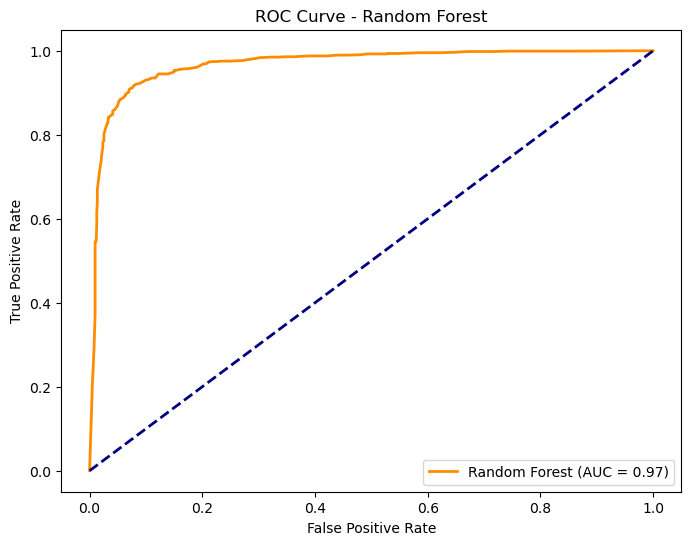

In [571]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_split, y_train_split)

# Make predictions on the test set
rf_y_pred = rf_classifier.predict(X_test_split)

# Evaluate the model
rf_accuracy = accuracy_score(y_test_split, rf_y_pred)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

# Confusion Matrix
rf_cm = confusion_matrix(y_test_split, rf_y_pred)
print(f"Confusion Matrix for Random Forest:\n{rf_cm}")

# Classification Report
rf_classification_report = classification_report(y_test_split, rf_y_pred)
print(f"Classification Report for Random Forest:\n{rf_classification_report}")

# ROC Curve
rf_probas = rf_classifier.predict_proba(X_test_split)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test_split, rf_probas)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

#### Gradient Boosting

Gradient Boosting Model Accuracy: 0.8000
Confusion Matrix for Gradient Boosting:
[[761 260]
 [154 895]]
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1021
           1       0.77      0.85      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



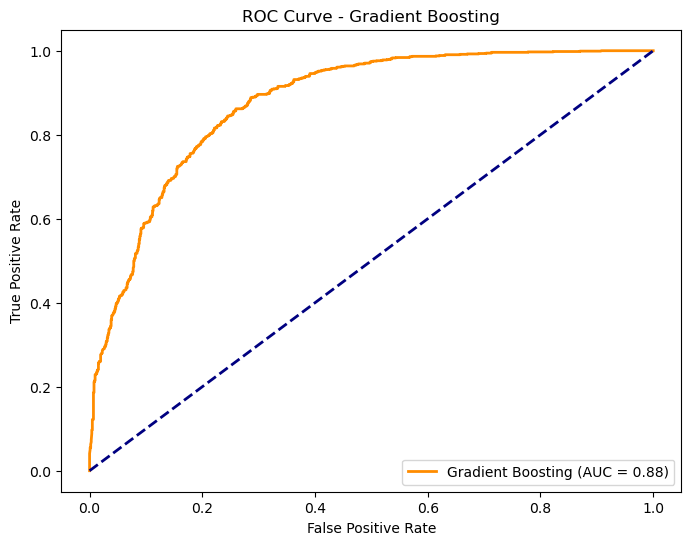

In [572]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_split, y_train_split)
gb_y_pred = gb_classifier.predict(X_test_split)

# Evaluate the model
gb_accuracy = accuracy_score(y_test_split, gb_y_pred)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy:.4f}")

# Confusion Matrix
gb_cm = confusion_matrix(y_test_split, gb_y_pred)
print(f"Confusion Matrix for Gradient Boosting:\n{gb_cm}")

# Classification Report
gb_classification_report = classification_report(y_test_split, gb_y_pred)
print(f"Classification Report for Gradient Boosting:\n{gb_classification_report}")

# ROC Curve
gb_probas = gb_classifier.predict_proba(X_test_split)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test_split, gb_probas)
gb_roc_auc = auc(gb_fpr, gb_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {gb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

#### Support Vector Machine (SVM)

SVM Model Accuracy: 0.8005
Confusion Matrix for SVM:
[[776 245]
 [168 881]]
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1021
           1       0.78      0.84      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



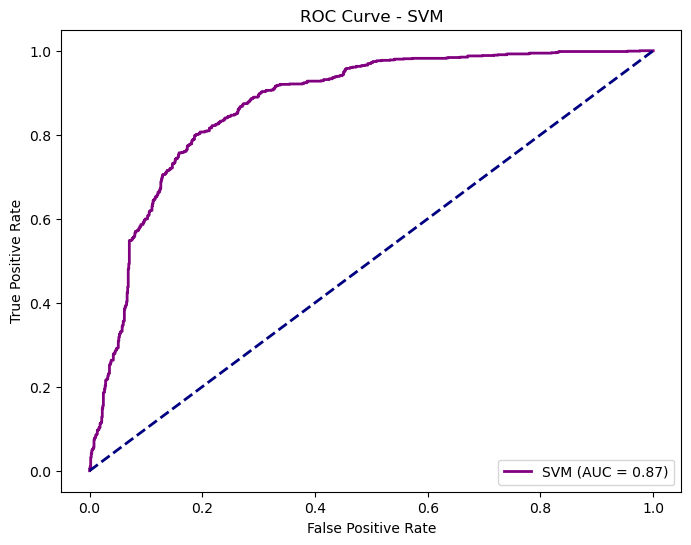

In [573]:
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_split, y_train_split)
svm_y_pred = svm_classifier.predict(X_test_split)

# Evaluate the model
svm_accuracy = accuracy_score(y_test_split, svm_y_pred)
print(f"SVM Model Accuracy: {svm_accuracy:.4f}")

# Confusion Matrix
svm_cm = confusion_matrix(y_test_split, svm_y_pred)
print(f"Confusion Matrix for SVM:\n{svm_cm}")

# Classification Report
svm_classification_report = classification_report(y_test_split, svm_y_pred)
print(f"Classification Report for SVM:\n{svm_classification_report}")

# ROC Curve
svm_probas = svm_classifier.predict_proba(X_test_split)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test_split, svm_probas)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='purple', lw=2, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

#### Logistic Regression

Logistic Regression Model Accuracy: 0.7850
Confusion Matrix for Logistic Regression:
[[760 261]
 [184 865]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1021
           1       0.77      0.82      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.79      0.78      2070



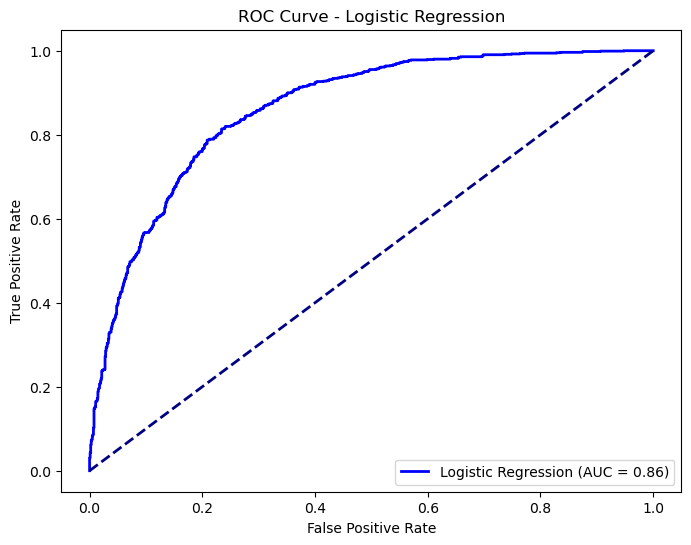

In [574]:
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_split, y_train_split)
lr_y_pred = lr_classifier.predict(X_test_split)

# Evaluate the model
lr_accuracy = accuracy_score(y_test_split, lr_y_pred)
print(f"Logistic Regression Model Accuracy: {lr_accuracy:.4f}")

# Confusion Matrix
lr_cm = confusion_matrix(y_test_split, lr_y_pred)
print(f"Confusion Matrix for Logistic Regression:\n{lr_cm}")

# Classification Report
lr_classification_report = classification_report(y_test_split, lr_y_pred)
print(f"Classification Report for Logistic Regression:\n{lr_classification_report}")

# ROC Curve
lr_probas = lr_classifier.predict_proba(X_test_split)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test_split, lr_probas)
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

#### XGBoost

XGBoost Model Accuracy: 0.8604
Confusion Matrix for XGBoost:
[[815 206]
 [ 83 966]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1021
           1       0.82      0.92      0.87      1049

    accuracy                           0.86      2070
   macro avg       0.87      0.86      0.86      2070
weighted avg       0.87      0.86      0.86      2070



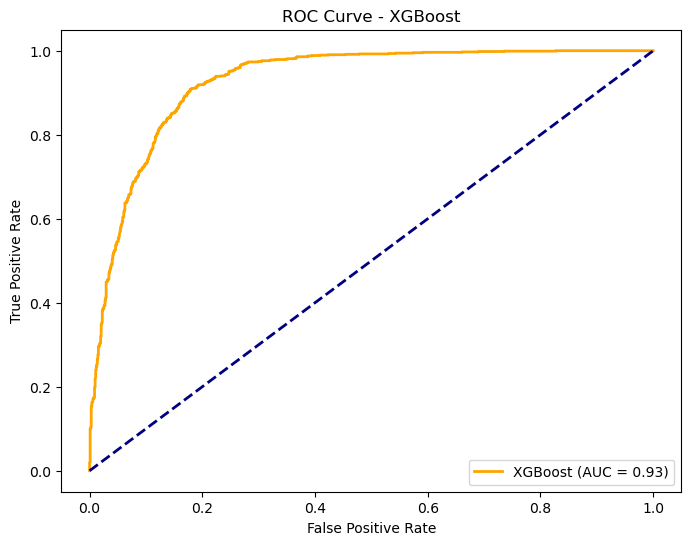

In [575]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_split, y_train_split)
xgb_y_pred = xgb_classifier.predict(X_test_split)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test_split, xgb_y_pred)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.4f}")

# Confusion Matrix
xgb_cm = confusion_matrix(y_test_split, xgb_y_pred)
print(f"Confusion Matrix for XGBoost:\n{xgb_cm}")

# Classification Report
xgb_classification_report = classification_report(y_test_split, xgb_y_pred)
print(f"Classification Report for XGBoost:\n{xgb_classification_report}")

# ROC Curve
xgb_probas = xgb_classifier.predict_proba(X_test_split)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_split, xgb_probas)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='orange', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

#### Decision Tree

Decision Tree Model Accuracy: 0.8821
Confusion Matrix for Decision Tree:
[[833 188]
 [ 56 993]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1021
           1       0.84      0.95      0.89      1049

    accuracy                           0.88      2070
   macro avg       0.89      0.88      0.88      2070
weighted avg       0.89      0.88      0.88      2070



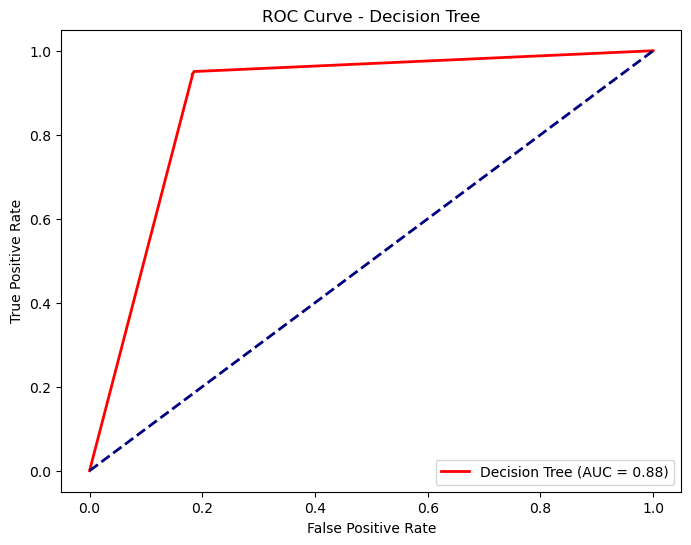

In [576]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_split, y_train_split)
dt_y_pred = dt_classifier.predict(X_test_split)

# Evaluate the model
dt_accuracy = accuracy_score(y_test_split, dt_y_pred)
print(f"Decision Tree Model Accuracy: {dt_accuracy:.4f}")

# Confusion Matrix
dt_cm = confusion_matrix(y_test_split, dt_y_pred)
print(f"Confusion Matrix for Decision Tree:\n{dt_cm}")

# Classification Report
dt_classification_report = classification_report(y_test_split, dt_y_pred)
print(f"Classification Report for Decision Tree:\n{dt_classification_report}")

# ROC Curve
dt_probas = dt_classifier.predict_proba(X_test_split)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test_split, dt_probas)
dt_roc_auc = auc(dt_fpr, dt_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, color='red', lw=2, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

#### Feature Importance

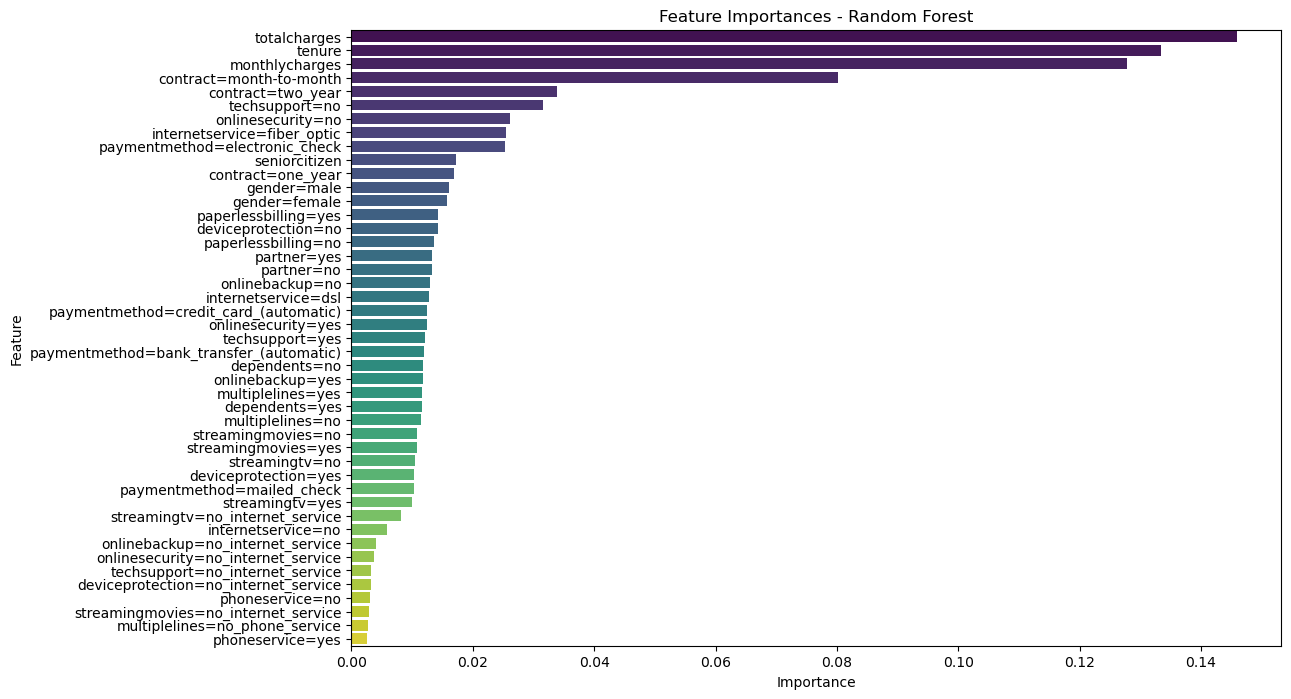

In [577]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Associate feature names with importance scores
feature_names = dv.get_feature_names_out(input_features=categorical + numerical)
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Display feature importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=[importance for _, importance in sorted_feature_importance],
            y=[feature for feature, _ in sorted_feature_importance],
            palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest')
plt.show()

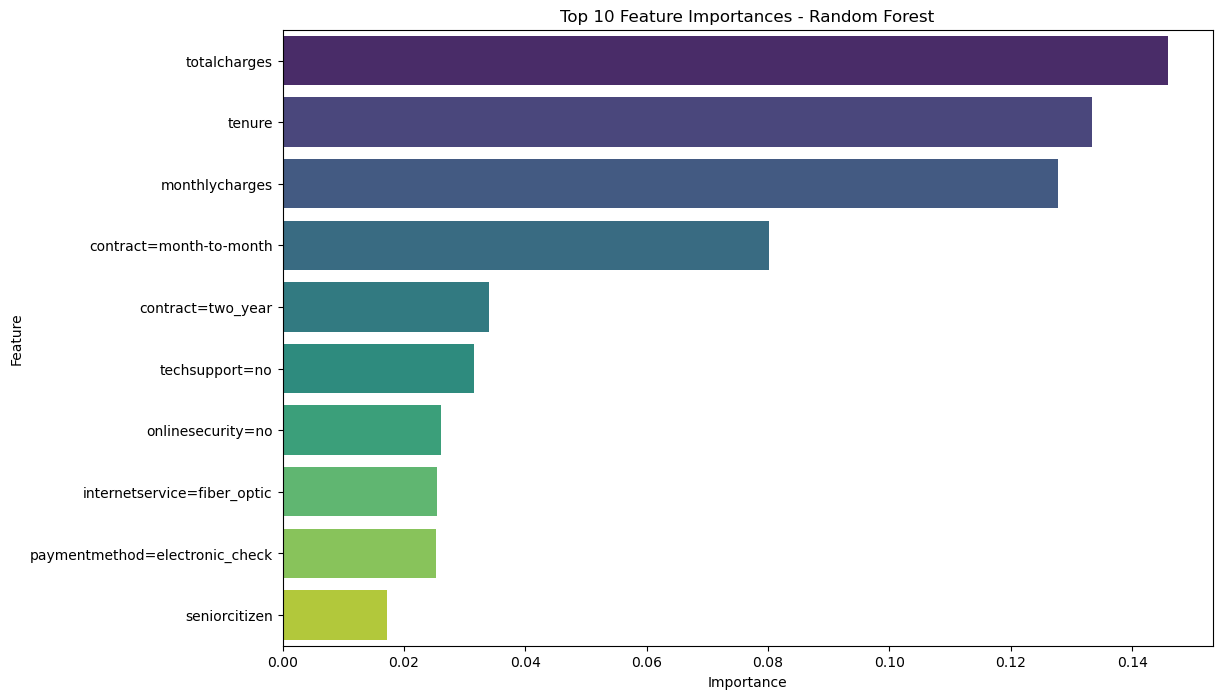

In [578]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Associate feature names with importance scores
feature_names = dv.get_feature_names_out(input_features=categorical + numerical)
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Display feature importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a bar plot for the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x=[importance for _, importance in sorted_feature_importance],
            y=[feature for feature, _ in sorted_feature_importance],
            palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

In [579]:
# Save the trained model to a file
joblib.dump(rf_classifier, 'random_forest_mod.joblib')

['random_forest_mod.joblib']

In [582]:
import pickle
model_file = 'model_C=1.0.bin'
with open(model_file, 'wb') as f_out:
    pickle.dump((dv, rf_classifier), f_out)

## Conclusion  

Customer churn poses a significant threat to a company's profitability, underscoring the necessity for effective churn prevention strategies. Understanding and implementing these strategies are key to retaining customers and ensuring sustained business success. The foremost approach to combat customer churn is for a company to intimately understand its customer base. This involves not only identifying customers at risk of churning but also actively working to enhance their satisfaction levels.  

Elevating customer service standards stands as a paramount focus in addressing this challenge. Moreover, cultivating customer loyalty by delivering personalized experiences and specialized services proves instrumental in curtailing churn rates. In addition, conducting thorough surveys among churned customers to comprehend their reasons for leaving empowers a company to proactively mitigate future customer churn. Through a comprehensive blend of these strategies, organizations can effectively minimize customer churn, foster customer loyalty, and ultimately bolster their bottom line.

## Recommendations for Customer Retention

Based on the insights gained from the feature importance analysis, we can devise several strategies and actions to reduce churn and improve customer retention. Here are some recommendations:  

#### Improve Fiber Optic Services: 
Comprehensive investigation into potential issues impacting fiber optic internet services that might be contributing to elevated churn rates. The primary focus should be on elevating service quality by addressing customer concerns promptly. It is crucial to invest in robust optimization of fiber optic internet services to ensure a seamless and superior user experience. Timely resolution of any identified issues and transparent communication of these improvements to customers should be a priority to enhance overall satisfaction and minimize churn.

#### Promote Long-Term Contracts:
Implement a strategy that involves offering enticing incentives and discounts to customers opting for long-term contracts. Emphasize the substantial benefits and cost savings linked to extended commitments. Aso, Develop a range of customizable long-term contract options tailored to diverse customer needs, providing discounts, additional services, or loyalty rewards to incentivize and encourage customers to commit to longer agreements.

#### Enhance Streaming Experience:

Invest substantively in the enhancement of streaming services by targeting features like "MonthlyCharges" and "MonthlyAverageSpending," which is related to streaming services, recognizing that customers leveraging these services exhibit reduced churn rates. Contemplate enriching the content library, optimizing the user interface, and implementing tailored content recommendations to cater to individual preferences, thereby enhancing user engagement and fostering long-term commitment.

#### Transparent Billing and Communication:

Conduct a thorough review of the pricing structure to guarantee its alignment with both customer expectations and industry benchmarks. Explore opportunities to offer clear, transparent billing information and present cost-effective plan options to customers.

Uphold a commitment to transparency in billing practices, educating customers about the various charges related to their services. Implement proactive and regular communication with customers to clarify their bills, elucidate any queries they may have, and provide comprehensive information about available plans to ensure an informed and satisfied customer base.

#### Targeted Marketing for Multiple Phone Lines:

Craft focused marketing initiatives highlighting the advantages of utilizing multiple phone lines, emphasizing the benefits for both families and businesses. Tailor discounts or packages to incentivize adoption and showcase the value of this offering.

Initiate an in-depth investigation into the reasons behind the increased churn rates among customers with multiple phone lines. Customize offerings to address their unique needs and concerns, ensuring a personalized approach that mitigates churn and fosters long-term commitment to this service.

#### Encourage Fixed-Term Contracts:

Drive customer engagement by promoting fixed-term contracts, offering discounted rates or exclusive features to entice customers into longer commitments. Emphasize the stability and notable benefits that come with opting for fixed-term plans.

Execute targeted marketing campaigns dedicated to showcasing the stability and potential cost savings associated with fixed-term contracts. Implement special promotions and incentives tailored for fixed-term commitments to further encourage customers to opt for extended agreements.

#### User-Friendly Device Protection:

Enhance the accessibility and user-friendliness of device protection services, ensuring a seamless experience for customers. Effectively communicate the value of protecting their devices, highlighting the peace of mind and convenience it offers.

Optimize and market device protection services to clearly demonstrate their value and wide-ranging benefits to customers. Address any concerns or limitations associated with these services, assuring customers of their effectiveness and enhancing their confidence in the protection service.

#### Diverse Payment Options:

Actively promote a range of payment methods, ensuring customers are well-informed about alternatives to electronic checks. Emphasize the ease, security, and advantages of utilizing diverse payment options.

Drive the adoption of payment methods beyond electronic checks to minimize churn. Offer incentives to encourage customers to opt for more stable and convenient payment options, thereby enhancing their overall payment experience.

#### Strengthen Online Security:

Commit to investing in robust online security measures to ensure a safe environment for our customers. Educate customers about the critical importance of online security, emphasizing the safety and protection they receive through enhanced security protocols.

Initiate informative campaigns aimed at raising awareness about online security risks and how our services effectively mitigate these threats. Provide comprehensive tutorials and guides to assist customers in securing their online activities and empowering them with the knowledge needed to navigate the digital landscape securely.

#### Continuous Customer Feedback:

Institute a well-structured feedback loop to consistently gather valuable insights from customers, encompassing their experiences and preferences. Proactively act on this feedback to drive meaningful improvements and showcase our unwavering dedication to meeting customer expectations.

Implement a dynamic system to continuously monitor customer behaviors and responses to our strategies. Iterate and tailor these strategies in real-time based on the gathered feedback and results, ensuring our approach remains adaptive and aligned with customer needs and aspirations.